In [87]:
#Author: Manash Shrestha
#CIS 3120
#Final Project
#web scraping and data visualization to scrap corona virus cases all over the world

# importing modules
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt

In [88]:
# requesting data from website
url = 'https://www.worldometers.info/coronavirus/'
r = requests.get(url)

In [91]:
# parsing it to beautiful soup
data = r.text
soup = BeautifulSoup(data,'html.parser')

In [92]:
# Printing basic data
print(soup.title.text)
print()
live_data = soup.find_all('div',id='maincounter-wrap')
for i in live_data:
    print(i.text)



Coronavirus Update (Live): 14,158,402 Cases and 597,993 Deaths from COVID-19 Virus Pandemic - Worldometer


Coronavirus Cases:

14,158,402 



Deaths:

597,993



Recovered:

8,411,189




In [93]:
# Extracting table data
table_body = soup.find('tbody')
table_rows = table_body.find_all('tr')
countries = []
cases = []
todays = []
deaths = []

In [94]:
for tr in table_rows:
    td = tr.find_all('td')
    countries.append(td[1].text)
    cases.append(td[2].text)
    todays.append(td[3].text)
    deaths.append(td[4].text)

In [81]:
indices = [i for i in range(1,len(countries)+1)]
headers = ['Countries','Total Cases','Todays Cases','Total Deaths']
df = pd.DataFrame(list(zip(countries,cases,todays,deaths)),index=indices,columns=headers)

In [82]:
print(df)

                  Countries Total Cases Todays Cases Total Deaths
1         \nNorth America\n   4,393,032      +73,491      193,276
2         \nSouth America\n   3,155,971      +41,530      114,628
3                  \nAsia\n   3,255,113      +60,818       76,507
4                \nEurope\n   2,644,854      +15,051      198,616
5                \nAfrica\n     686,289      +18,221       14,711
..                      ...         ...          ...          ...
219  British Virgin Islands           8                        1 
220               St. Barth           6                          
221   Saint Pierre Miquelon           4           +2             
222                Anguilla           3                          
223                   China      83,622          +10       4,634 

[223 rows x 4 columns]


In [60]:
#changing data fram to 30 to print out top 30 countries in the table
df30 = df.head(30)

In [83]:
df30

,Countries,Total Cases,Todays Cases,Total Deaths
1,\nNorth America\n,"4,389,987","+70,446","193,252"
2,\nSouth America\n,"3,152,020","+37,579","114,444"
3,\nAsia\n,"3,255,113","+60,818","76,507"
4,\nEurope\n,"2,644,556","+14,753","198,612"
5,\nAfrica\n,"685,842","+17,774","14,706"
6,\nOceania\n,"12,909",+430,138
7,\n\n,721,,15
8,World,"14,141,148","+201,800","597,674"
9,USA,"3,755,870","+60,845","141,869"
10,Brazil,"2,046,328","+31,590","77,851"


In [85]:
#defining function to print specific country's data
def showCountry(cn):
    checkcn = df['Countries'] == cn
    data = df[checkcn]
    print(data.head())


In [86]:
c1 = input('Enter country name : ').title()
showCountry(c1)

Enter country name : china
    Countries Total Cases Todays Cases Total Deaths
223     China      83,622          +10       4,634 


In [64]:
#Saving the whole data in a csv file
df.to_csv('corona-virus-cases.csv')

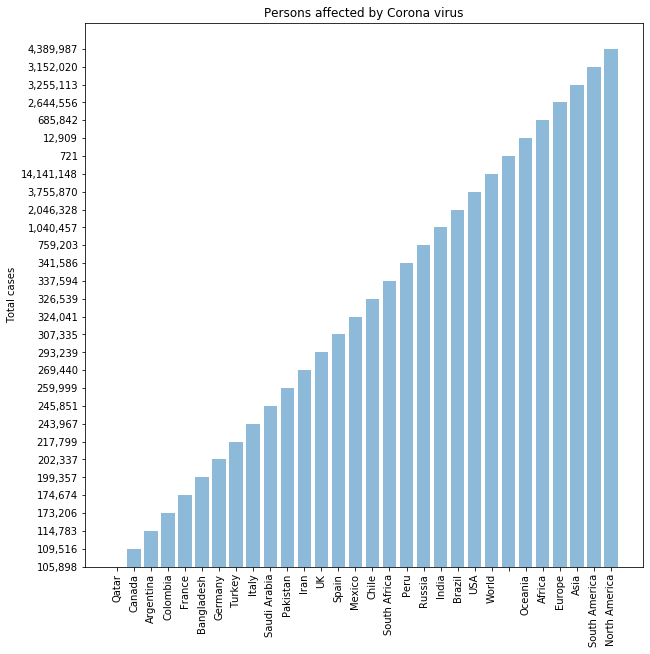

In [65]:
#plotting a graph for top 30 affected countries
cases_sliced = cases[:30]
countries_sliced = countries[:30]

y_pos = list(range(len(countries_sliced)))


plt.figure(figsize = (10,10))
plt.bar(y_pos,cases_sliced[::-1],align='center',alpha=0.5)
plt.xticks(y_pos,countries_sliced[::-1],rotation=90)
plt.ylabel('Total cases')
plt.title('Persons affected by Corona virus')
plt.savefig('Corona-analysis.png',dpi=600)
plt.show()

In [66]:
#gathering data from different csv files
#make sure you copy the external csv files in your folder
confirmed = pd.read_csv('covid19_confirmed.csv')
deaths = pd.read_csv('covid19_deaths.csv')
recovered = pd.read_csv('covid19_recovered.csv')
print(confirmed.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  \
0        0        0        0  ...    2469    2704    2894    3224    3392   
1        0        0        0  ...     789     795     803     820     832   
2        0        0        0  ...    4295    4474    4648    4838    4997   
3        0        0        0  ...     747     748     750     751     751   
4        0        0        0  ...      35      35      35      36      36   

   5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  
0    3563 

As you can see, we have some initial columns including data like the country or the region and the province or the state. Then after the first four columns we have the dates and the respective confirmed cases (or deaths or recoveries) for that day.

For reasons of simplicity we are going to drop the ‘Province/State’ column and add up the values of all rows of the same country. Also we are going to get rid of the ‘Lat’ and the ‘Long’ columns, which are the coordinates. After that we also want to transpose the data frame. This means we want to have the dates as rows and the countries as columns.

In [67]:

confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered = recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

confirmed = confirmed.T
deaths = deaths.T
recovered = recovered.T

In [68]:
#CALCULATING KEY STATISTICS
new_cases = confirmed.copy()

for day in range(1, len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]

growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100

active_cases = confirmed.copy()

for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recovered.iloc[day]

overall_growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day-1]) / active_cases.iloc[day - 1]) * 100

death_rate = confirmed.copy()

for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

With the data we now have, we can calculate a lot of different additional values. For example, since we have the deaths and the confirmed cases, we can calculate the death rate by country. The same can be done with recoveries. Also, looking at the confirmed cases, we can look back one day and calculate the growth rate of both deaths and confirmed cases. And last but not least we can also calculate the number of active cases by subtracting the deaths and recoveries from the confirmed cases.

In [69]:
hospitalization_rate_estimate = 0.05

hospitalization_needed = confirmed.copy()

for day in range(0, len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate

In [70]:
estimated_death_rate = 0.03
print(deaths['Italy'].tail()[4] / estimated_death_rate)

1024633.3333333334


Now let us get into some visualizations to see what this data actually looks like. First we are going to plot the total confirmed cases for multiple countries.

No handles with labels found to put in legend.


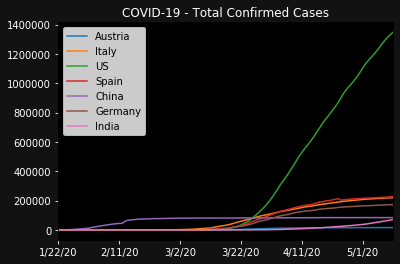

In [71]:
#visualizing the data
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 - Total Confirmed Cases', color='white')
ax.legend(loc="upper left")

countries = ['Austria', 'Italy', 'US', 'Spain', 'China', 'Germany', 'India']

for country in countries:
    confirmed[country][0:].plot(label = country)

plt.legend(loc='upper left')
plt.show()

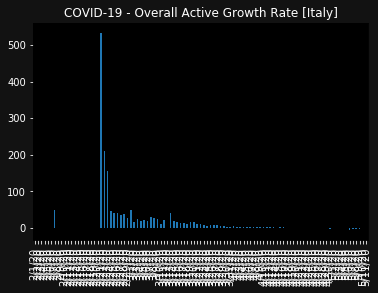

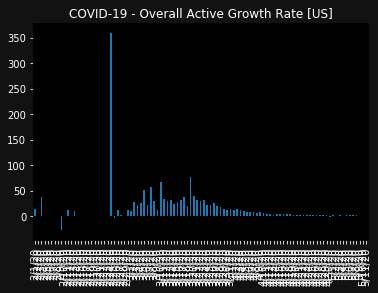

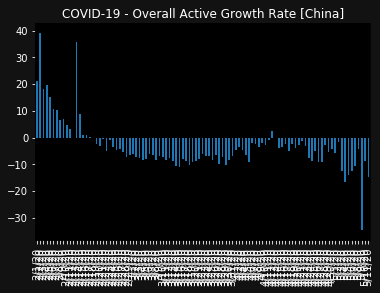

In [72]:
countries = ['Italy', 'US', 'China']

for country in countries:
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_title(f'COVID-19 - Overall Active Growth Rate [{country}]', color='white')
    overall_growth_rate[country][10:].plot.bar()
    plt.show()

In very few countries like China, you can actually see a negative growth rate, which means that not only are people getting sick slower but that the number of active cases is decreasing every day.

In [73]:
#running simulations
simulation_growth_rate = 0.1

dates = pd.date_range(start='5/13/2020', periods=40, freq='D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%Y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index=dates))

for day in range(len(confirmed), len(confirmed)+40):
    simulated.iloc[day] = simulated.iloc[day - 1] * (simulation_growth_rate + 1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


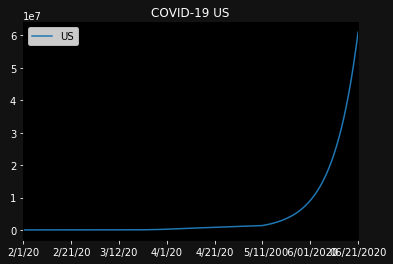

In [74]:
ax = simulated['US'][10:].plot(label="US")
ax.set_axisbelow(True)
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 US', color='white')
ax.legend(loc="upper left")

plt.show()

The number of infected people would then be four million. Of course this doesn’t take any counter-measures into account. Also this formula is blind to natural limits like population size. If you choose 20% and run this for a longer time, you will have infected more Americans than there are people on earth. Therefore this simulation is not at all accurate. But you can play around with ideas like this one.